In [201]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

In [202]:
"""Generate the ground truth and sensor measurement signals:
ground truth: x = t^2
measurement: z = t^2 + normal(0, 0.01) 
"""
t = np.arange(start=0, stop=1, step=0.01) # time sequence
x = [] # used to store the ground truth
z = [] # used to store the measurement

for i in range(len(t)):
    temp = t[i]**3
    x.append(temp)
    z.append(temp + np.random.normal(loc=0.0, scale=0.1))

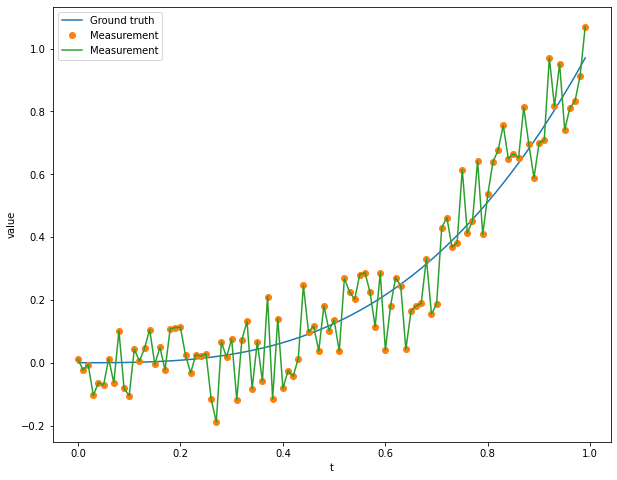

In [203]:
# Visualize the generated signals
plt.figure(figsize=(10, 8))
plt.xlabel('t')
plt.ylabel('value')
plt.plot(t, x, label='Ground truth')
plt.plot(t, z, 'o', t, z, label='Measurement')
plt.legend()
plt.show()

In [204]:
"""Example 1
Prediction func:
X(k) = F * X(k-1) + Q; Q ~ N(0, 1)

Measurement func:
Z(k) = H * X(k) + R; R ~ N(0, 1)
"""
F, H, Q, R = 1., 1., 1., 1.



In [205]:
"""Kalman filter:
X(k)_prior = F * X(k-1)_posterior_last_time
P(k)_prior = F * P(k-1)_posterior_last_time * F_trans + Q
K = P(k)_prior * H_trans * inv(H * P(k)_prior * H_trans + R)
X(k)_posterior = X(k)_prior + K * (Y(k) - H * X(k)_prior)
P(k)_posterior = (I - K * H) * P(k)_prior
"""
X_fused = [] # used to sotre the filtered value
P_fused = [] # used to store the filtered variance

# Setup the initial value
x_posterior_last_time = 0.0
p_posterior_last_time = 0.3 ** 2

X_fused.append(x_posterior_last_time)
P_fused.append(p_posterior_last_time)

In [206]:
# Start the kalman filter process
for i in range(1, len(t)):
    x_prior = F * x_posterior_last_time
    p_prior = F * p_posterior_last_time * F + Q

    K = (p_prior * H) / (H * p_prior * H + R)
    x_posterior = x_prior + K * (z[i] - H * x_prior)
    p_posterior = (1 - K * H) * p_prior

    X_fused.append(x_posterior)
    P_fused.append(p_posterior)

    x_posterior_last_time = x_posterior
    p_posterior_last_time = p_posterior

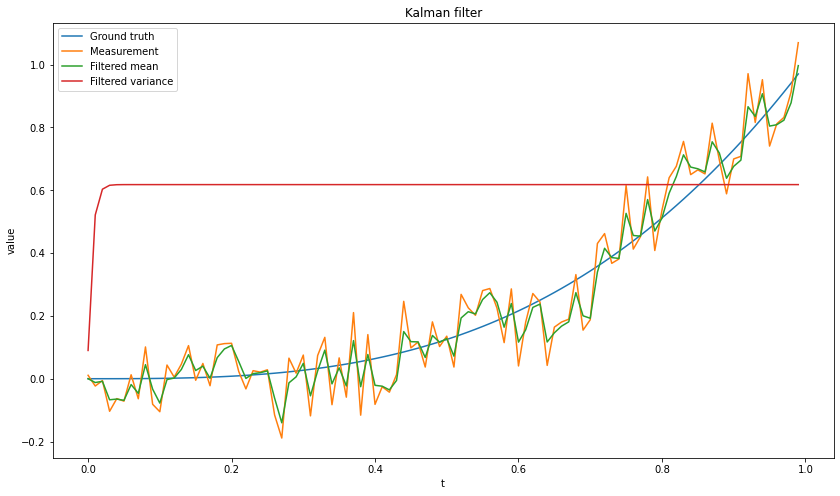

In [207]:
# Visualize the kalman filter result
plt.figure(figsize=(14, 8))
plt.title('Kalman filter')
plt.xlabel('t')
plt.ylabel('value')
plt.plot(t, x, label='Ground truth')
plt.plot(t, z, label='Measurement')
plt.plot(t, X_fused, label='Filtered mean')
plt.plot(t, P_fused, label='Filtered variance')
plt.legend()
plt.show()

In [208]:
"""Example 2
Prediction func:
x(k)   = x(k-1)   + x'(k-1)*dt + x''(k-1)*(dt)^2 * (1/2!)  + Q1
x'(k)  = 0*x(k-1) + x'(k-1)    + x''(k-1)*dt               + Q2
x''(k) = 0*x(k-1) + 0*x'(k-1)  + x''(k-1)                  + Q3
State variable:
X = [x(k), x'(k), x''(k)].T
F = [[1, dt, 0.5*dt^2],
     [0,  1,    dt   ],
     [0,  0,     1   ]]
Q = [[Q1, 0,  0],
     [ 0, Q2, 0],
     [ 0, 0,  Q3]]
Q1 ~ N(0, 1); Q2 ~ N(0, 0.01); Q3 ~ N(0, 0.001)
X(k) = F * X(k-1) + Q

Measurement func:
Z(k) = H * X(k) + R
R ~ N(0, 1)
H = [1, 0, 0]
"""
dt = t[1] - t[0]
F2 = np.matrix([[1, dt, 0.5*dt**2],
                [0,  1,    dt    ],
                [0,  0,    1     ]], dtype=float)
H2 = np.matrix([1, 0, 0], dtype=float)
Q2 = np.matrix([[1,  0,   0  ],
                [0, 0.01, 0  ],
                [0,  0, 0.001]], dtype=float)
R2 = np.matrix([1], dtype=float)

X_fused_2 = [] # used to sotre the filtered value
P_fused_2 = [] # used to store the filtered variance

In [209]:
# Setup the initial value
X_posterior_last_time = np.matlib.zeros(shape=(3, 1), dtype=float)
P_posterior_last_time = np.matrix([[0.3**2,  0,           0  ],
                                   [0,       0.01**2,      0  ],
                                   [0,        0,      0.001**2]], dtype=float)

X_fused_2.append(X_posterior_last_time)
P_fused_2.append(P_posterior_last_time)


In [210]:
# Start the kalman filter process
for i in range(1, len(t)):
    X_prior = F2 * X_posterior_last_time
    P_prior = F2 * P_posterior_last_time * F2.T + Q2

    K = (P_prior * H2.T) * np.linalg.inv(H2 * P_prior * H2.T + R2)
    X_posterior = X_prior + K * (z[i] - H2 * X_prior)
    P_posterior = (np.matlib.identity(n=3, dtype=float) - K * H2) * P_prior

    X_fused_2.append(X_posterior)
    P_fused_2.append(P_posterior)

    X_posterior_last_time = X_posterior
    P_posterior_last_time = P_posterior

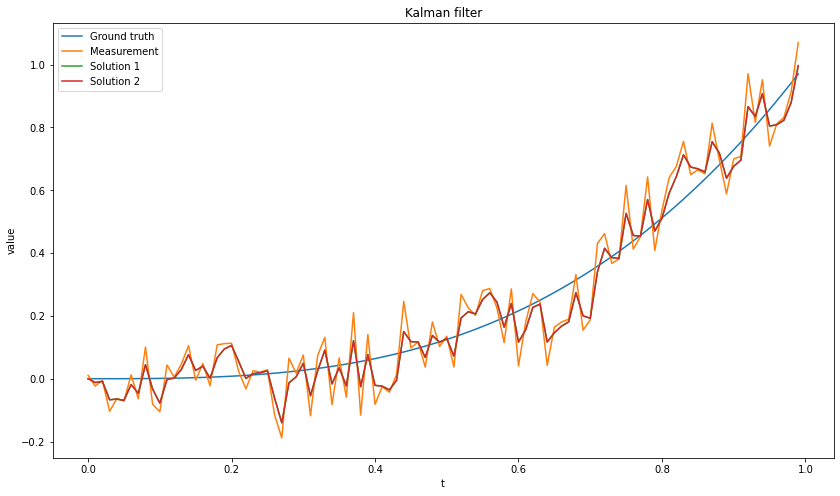

In [211]:
# Visualize the kalman filter result
plt.figure(figsize=(14, 8))
plt.title('Kalman filter')
plt.xlabel('t')
plt.ylabel('value')
plt.plot(t, x, label='Ground truth')
plt.plot(t, z, label='Measurement')
plt.plot(t, X_fused, label='Solution 1')
plt.plot(t, np.asarray(X_fused_2)[:, 0, 0], label='Solution 2')
plt.legend()
plt.show()
